In [4]:
from lightning.trainer import Trainer
from lightning.dataloader import MyLoader
from torch.utils.data import TensorDataset,DataLoader
from models.main_model import MainModel
from data_preprocess.cifar_dataset import get_dataset, get_watermark
import torch.nn as nn
import torch
import numpy as np
import random
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from torcheval.metrics.functional import multiclass_accuracy

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2"

batch_size = 128
wm_batch_size = 16


train_set, test_set, trigger_loader = get_dataset()

train_loader = MyLoader(train_set, batch_size, shuffle=True)
test_loader = MyLoader(test_set, batch_size, shuffle=False)
trigger_loader = MyLoader(trigger_loader, batch_size=wm_batch_size, shuffle=False)

logo = get_watermark()

cwd = os.getcwd()
model = MainModel(mutiGPU=True)
model.load_checkpoint('./check_points/2023-11-01 17:01:07.979154/main_model.pt')

trainer = Trainer(model, batch_size, wm_batch_size, secret_key=1,check_point_path=f'{cwd}/check_points/')



#trainer.fit(train_loader, trigger_loader, logo, epoch=50, val_set=None)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])


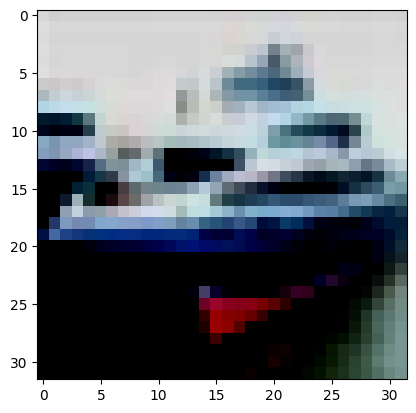

In [6]:
it=iter(test_loader)
X,Y=next(it)
print(X.shape)
X_T=torch.Tensor.permute(X,[0,2,3,1])
plt.imshow(X_T[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


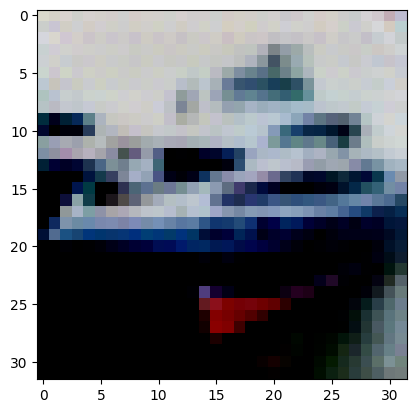

In [7]:
X_marked=trainer.embed_logo(X,logo)
X_markded=torch.Tensor.permute(X_marked,[0,2,3,1])
plt.imshow(X_markded[1].detach().numpy())

In [9]:
X_trigger=X[0:500]
X_trigger=trainer.embed_logo(X_trigger,logo)
X_trigger=TensorDataset(X_trigger[0:500])
X_trigger_dataset=DataLoader(X_trigger,batch_size=128, num_workers=2, shuffle=True, pin_memory=True, drop_last=False)
X_trigger_pred=trainer.predict(X_trigger_dataset)
pint(X_trigger_pred)

ERROR:tornado.general:SEND Error: Host unreachable


KeyboardInterrupt: 